In [4]:
import os, sys, numpy, pandas, pylab, importlib, pickle, gzip
from covid19_stats.engine import core
from covid19_stats.engine.viz import display_msa
from covid19_stats.engine import viz2
%matplotlib inline

This notebook tests whether the Metropolitan Statistical Area (MSA) makes sense. Here, you just plop out which MSA to visualize, say "chicago" or "nyc". It will spit out a figure showing the counties, with FIPS numbers, for that metro region.

Looks like I have all the counties defined for the NYC Metro Area. After git commit [#fd664d](https://github.com/tanimislam/covid19_stats/commit/fd664daaec025943e4b550c981ae3ea3aace6a28), New York City is a county in the "nyc" metro area with FIPS # "00001".

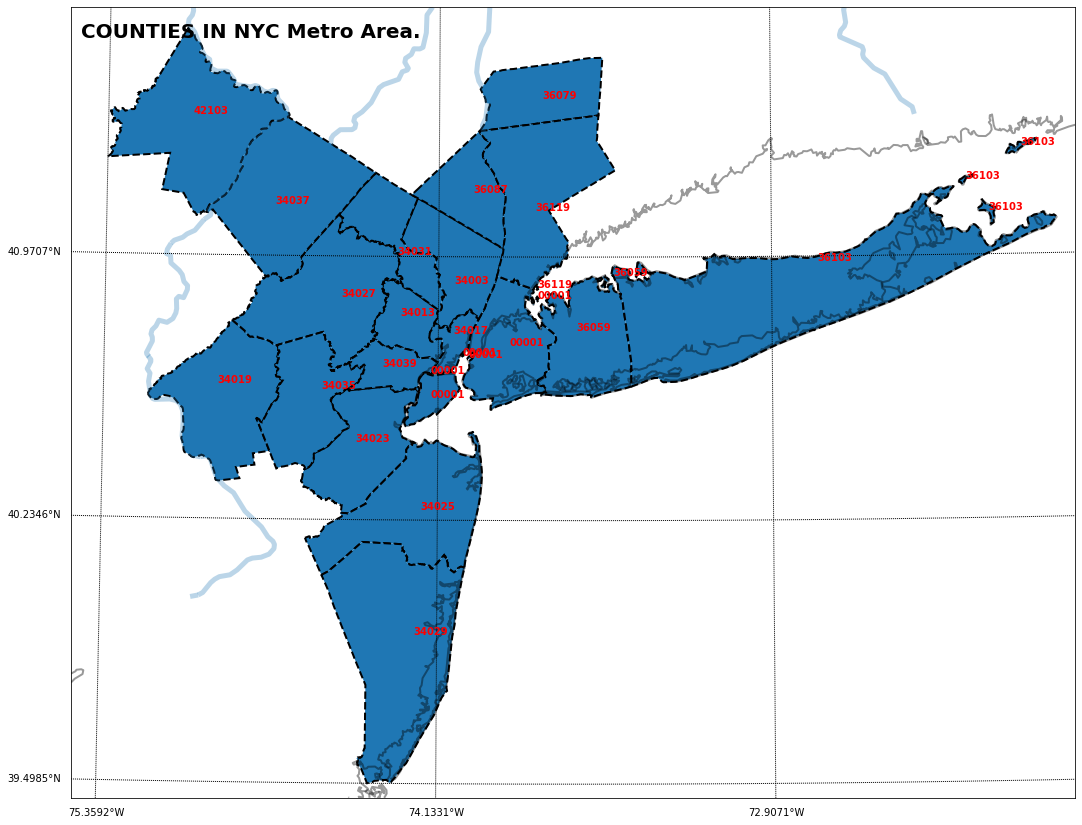

In [2]:
fig, ax = pylab.subplots( )
fig.set_size_inches([15,12])
display_msa( 'nyc', ax )

Now do the stuff I should have done before. Get and serialize the incident data for the SF Bay Area. *ONLY RUN THIS ONCE. SUBSEQUENT CALLS WILL LOAD IN THE SERIALIZED DATA.*

In [5]:
inc_data = core.get_incident_data( core.get_msa_data( 'bayarea') )
pickle.dump( inc_data, gzip.open( 'bayarea.pkl.gz', 'wb'))

IF RESTARTING, START HERE.

In [6]:
inc_data = pickle.load( gzip.open( 'bayarea.pkl.gz', 'rb' ) )
viz2._default_startdate in set(inc_data['df'].date)

True

In [7]:
last_delta_fromdate = max(inc_data['df'].date) - viz2._default_startdate

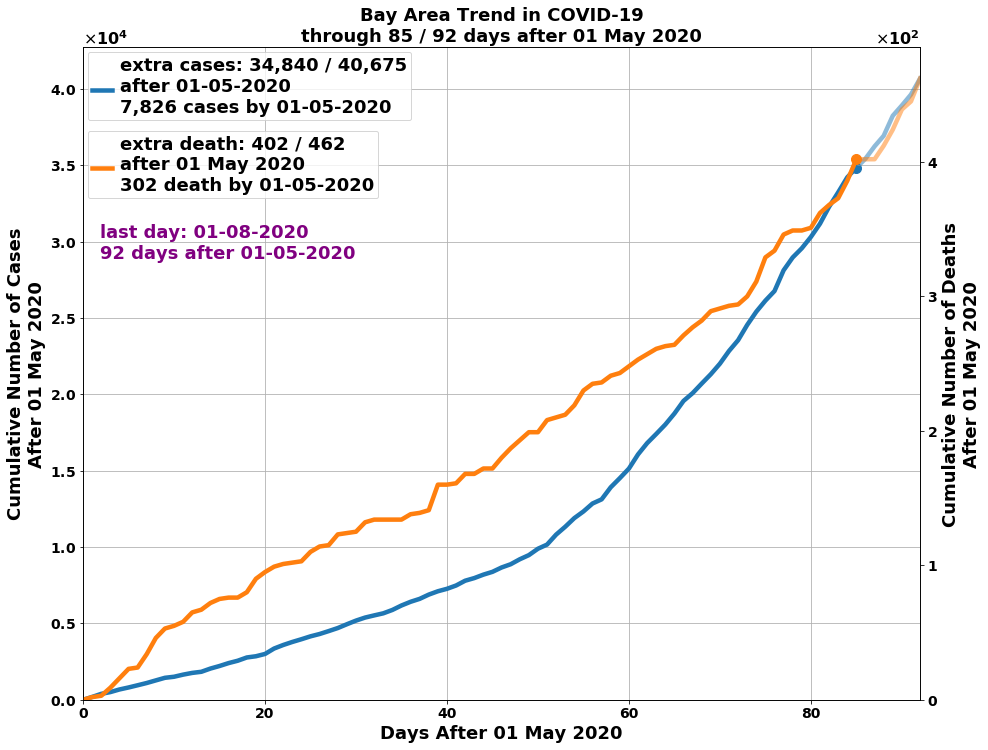

In [97]:
importlib.reload( viz2 )
fig, ax = pylab.subplots( )
ax2 = ax.twinx( )
fig.set_size_inches([15,12])
df_sub = viz2.plot_cases_deaths_region_linear_fromdate( inc_data, 'Bay Area', ax, ax2, days_from_beginning=85 )

In [96]:
fnames = viz2.create_plots_days_from_startdate( inc_data, 'Bay Area', 'bayarea', days_from_beginning=[85,86] )

In [88]:
inc_data['df'].keys()

Index(['date', 'cases', 'death', 'days_from_beginning', 'cases_06001',
       'deaths_06001', 'cases_06013', 'deaths_06013', 'cases_06041',
       'deaths_06041', 'cases_06055', 'deaths_06055', 'cases_06069',
       'deaths_06069', 'cases_06075', 'deaths_06075', 'cases_06081',
       'deaths_06081', 'cases_06085', 'deaths_06085'],
      dtype='object')

In [98]:
movie_name = viz2.create_summary_movie_from_startdate( core.get_msa_data( 'bayarea'),
                                                      maxnum_colorbar_cases=15000, maxnum_colorbar_death=250 )